In [142]:
import pickle
import numpy as np

with open('data.pkl', 'rb') as file:
    right_pose_3d = pickle.load(file)
    wrong_pose_2d = pickle.load(file)
    rotation_matrix = pickle.load(file)
    translation_vector = pickle.load(file)
    intrinsic_matrix = pickle.load(file)
    projection_matrix = pickle.load(file)

print("right_pose_3d.shape : ", right_pose_3d.shape)
print("wrong_pose_2d.shape : ", wrong_pose_2d.shape)
print("rotation_matrix.shape : ", rotation_matrix.shape)
print("translation_vector.shape : ", translation_vector.shape)
print("intrinsic_matrix.shape : ", intrinsic_matrix.shape)
print("projection_matrix.shape : ", projection_matrix.shape)

right_pose_3d.shape :  (25, 4)
wrong_pose_2d.shape :  (25, 3)
rotation_matrix.shape :  (3, 3)
translation_vector.shape :  (3, 1)
intrinsic_matrix.shape :  (3, 3)
projection_matrix.shape :  (3, 4)


In [143]:
import cv2
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from enum import Enum

class BODY_PARTS_POSE_25(Enum):
    NOSE = 0
    NECK = 1
    RIGHT_SHOULDER = 2
    RIGHT_ELBOW = 3
    RIGHT_WRIST = 4
    LEFT_SHOULDER = 5
    LEFT_ELBOW = 6
    LEFT_WRIST = 7
    MID_HIP = 8
    RIGHT_HIP = 9
    RIGHT_KNEE = 10
    RIGHT_ANKLE = 11
    LEFT_HIP = 12
    LEFT_KNEE = 13
    LEFT_ANKLE = 14
    RIGHT_EYE = 15
    LEFT_EYE = 16
    RIGHT_EAR =17
    LEFT_EAR = 18
    LEFT_BIG_TOE = 19
    LEFT_SMALL_TOE = 20
    LEFT_HEEL = 21
    RIGHT_BIG_TOE = 22
    RIGHT_SMALL_TOE = 23
    RIGHT_HEEL = 24

BODY_BONES_POSE_25 = [ (BODY_PARTS_POSE_25.NOSE, BODY_PARTS_POSE_25.LEFT_EYE),
                (BODY_PARTS_POSE_25.LEFT_EYE, BODY_PARTS_POSE_25.LEFT_EAR),
                (BODY_PARTS_POSE_25.NOSE, BODY_PARTS_POSE_25.RIGHT_EYE),
                (BODY_PARTS_POSE_25.RIGHT_EYE, BODY_PARTS_POSE_25.RIGHT_EAR),
                (BODY_PARTS_POSE_25.NOSE, BODY_PARTS_POSE_25.NECK),
                (BODY_PARTS_POSE_25.NECK, BODY_PARTS_POSE_25.RIGHT_SHOULDER),
                (BODY_PARTS_POSE_25.NECK, BODY_PARTS_POSE_25.LEFT_SHOULDER),
                (BODY_PARTS_POSE_25.LEFT_SHOULDER, BODY_PARTS_POSE_25.LEFT_ELBOW),
                (BODY_PARTS_POSE_25.LEFT_ELBOW, BODY_PARTS_POSE_25.LEFT_WRIST),
                (BODY_PARTS_POSE_25.RIGHT_SHOULDER, BODY_PARTS_POSE_25.RIGHT_ELBOW),
                (BODY_PARTS_POSE_25.RIGHT_ELBOW, BODY_PARTS_POSE_25.RIGHT_WRIST),
                (BODY_PARTS_POSE_25.NECK, BODY_PARTS_POSE_25.MID_HIP),
                (BODY_PARTS_POSE_25.MID_HIP, BODY_PARTS_POSE_25.LEFT_HIP),
                (BODY_PARTS_POSE_25.MID_HIP, BODY_PARTS_POSE_25.RIGHT_HIP),
                (BODY_PARTS_POSE_25.LEFT_HIP, BODY_PARTS_POSE_25.LEFT_KNEE),
                (BODY_PARTS_POSE_25.LEFT_KNEE, BODY_PARTS_POSE_25.LEFT_ANKLE),
                (BODY_PARTS_POSE_25.LEFT_ANKLE, BODY_PARTS_POSE_25.LEFT_SMALL_TOE),
                (BODY_PARTS_POSE_25.LEFT_ANKLE, BODY_PARTS_POSE_25.LEFT_HEEL),
                (BODY_PARTS_POSE_25.LEFT_SMALL_TOE, BODY_PARTS_POSE_25.LEFT_BIG_TOE),
                (BODY_PARTS_POSE_25.RIGHT_HIP, BODY_PARTS_POSE_25.RIGHT_KNEE),
                (BODY_PARTS_POSE_25.RIGHT_KNEE, BODY_PARTS_POSE_25.RIGHT_ANKLE),
                (BODY_PARTS_POSE_25.RIGHT_ANKLE, BODY_PARTS_POSE_25.RIGHT_SMALL_TOE),
                (BODY_PARTS_POSE_25.RIGHT_ANKLE, BODY_PARTS_POSE_25.RIGHT_HEEL),
                (BODY_PARTS_POSE_25.RIGHT_SMALL_TOE, BODY_PARTS_POSE_25.RIGHT_BIG_TOE),
                ]


ID_COLORS = [(232, 176, 59)
            ,(175, 208, 25)
            ,(102, 205, 105)
            ,(185, 0, 255)
            ,(99, 107, 252)
            ,(1, 146, 103)
            ,(0, 200, 151)
            ,(255, 211, 101)
            ,(83, 62, 133)
            ,(72, 143, 177)
            ,(79, 211, 196)
            ,(193, 248, 207)
            ,(25, 25, 25)
            ,(45, 66, 99)
            ,(200, 75, 49)
            ,(236, 219, 186)
            ]

def generate_color_id_u(idx):
    arr = []
    if(idx < 0):
        arr = [236,184,36,255]
    else:
        color_idx = idx % 16
        arr = [ID_COLORS[color_idx][0], ID_COLORS[color_idx][1], ID_COLORS[color_idx][2], 255]
    return arr

def draw_skeleton_image(image, keypoint, bboxs):
    # print(keypoint.shape)
    for person_id in range(keypoint.shape[0]):
        if bboxs is not None:
            bbox = bboxs[person_id]
        person_keypoints = keypoint[person_id]
        line_color = generate_color_id_u(person_id) # person_id

        pos = person_keypoints[BODY_PARTS_POSE_25.LEFT_SHOULDER.value]
        cv2.putText(image, str(person_id), (int(pos[0]), int(pos[1])), cv2.FONT_ITALIC, 1, (0,255,0), 1)
        #cv2.putText(image, str(person_id), (pos[0], pos[1]), cv2.FONT_HERSHEY_SIMPLEX, 1, color='white')

        # if bbox is not None:
        #     if bbox[0] < image.shape[1] and bbox[1] < image.shape[0] and bbox[2] < image.shape[1] and bbox[3] < image.shape[0]:
        #         cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), line_color, 1)

        # Draw skeleton bones
        for part in BODY_BONES_POSE_25:
            kp_a = person_keypoints[part[0].value]
            kp_b = person_keypoints[part[1].value]
            # Check that the person_keypoints are inside the image
            if(kp_a[0] < image.shape[1] and kp_a[1] < image.shape[0]
            and kp_b[0] < image.shape[1] and kp_b[1] < image.shape[0]
            and kp_a[0] > 0 and kp_a[1] > 0 and kp_b[0] > 0 and kp_b[1] > 0 ):
                if kp_a[2] > 0.0 and kp_b[2] > 0.0:
                    cv2.line(image, (int(kp_a[0]), int(kp_a[1])), (int(kp_b[0]), int(kp_b[1])), line_color, 1, cv2.LINE_AA)

        for i, part in enumerate(BODY_PARTS_POSE_25):
            kp = person_keypoints[part.value]
            # print("[{}] {}".format(i, kp))

            # circle_color = generate_color_id_u(part.value)
            circle_color = generate_color_id_u(person_id)
            if kp[2] > 0.0:
                cv2.circle(image, (int(kp[0]), int(kp[1])), 3, circle_color, -1)
    return image

def draw_3d_skeleton(ax, skeletons, person_id, seq_name=None):
    import copy
    skeletons = copy.deepcopy(skeletons)
    #skeletons[:,2] = -1*skeletons[:,2]

    clr = generate_color_id_u(person_id)
    plt_clr = [clr[2]/255, clr[1]/255, clr[0]/255]

    print("Skeletons Shape : ", skeletons.shape)

    if skeletons.shape[0] == 25:
        # Add labels
        for bone in BODY_BONES_POSE_25:
            kp_1 = skeletons[bone[0].value]
            kp_2 = skeletons[bone[1].value]
            if(kp_1[3] > 0.05 and kp_2[3] > 0.05):
                ax.plot([kp_1[0], kp_2[0]], [kp_1[1], kp_2[1]], [kp_1[2], kp_2[2]], color=plt_clr, label=str(person_id))
                break

        for bone in BODY_BONES_POSE_25:
            kp_1 = skeletons[bone[0].value]
            kp_2 = skeletons[bone[1].value]
            if(kp_1[3] > 0.05 and kp_2[3] > 0.05):
                ax.plot([kp_1[0], kp_2[0]], [kp_1[1], kp_2[1]], [kp_1[2], kp_2[2]], color=plt_clr)

        for part in BODY_PARTS_POSE_25:
            kp = skeletons[part.value]
            if kp[3] > 0.05:
                circle_color = generate_color_id_u(part.value)
                plt_circle_clr = [circle_color[0]/255, circle_color[1]/255, circle_color[2]/255]
                ax.scatter(kp[0], kp[1], kp[2], s=5, color=plt_clr)
    ax.legend()

Skeletons Shape :  (25, 4)


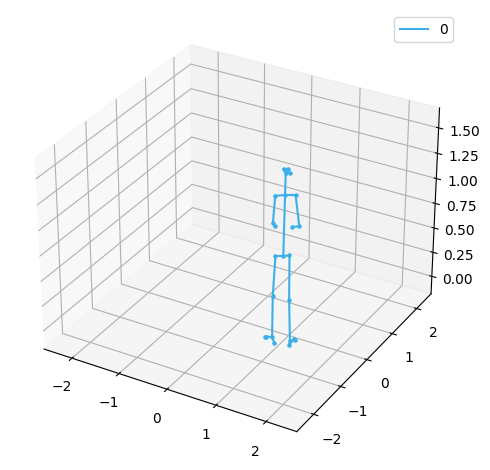

In [144]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.tight_layout()

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

draw_3d_skeleton(ax, right_pose_3d, 0)

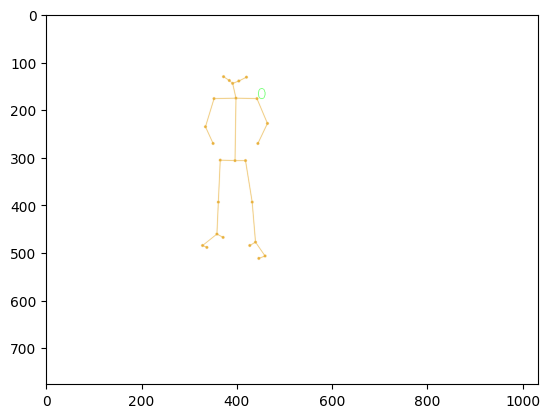

In [145]:
fig = plt.figure()
plt.tight_layout()

white_bg = np.zeros((776, 1032, 3), dtype=np.uint8)
white_bg[:] = 255

image = draw_skeleton_image(white_bg, np.array([wrong_pose_2d]), None)
plt.imshow(image)
plt.show()

In [146]:

distortion_coeffs = np.zeros(4)

wrong_pose_2d_crop = wrong_pose_2d[:, :2].astype(np.float32)
right_pose_3d_crop = right_pose_3d[:, :3].astype(np.float32)

print(intrinsic_matrix)


[[1.13006555e+03 0.00000000e+00 5.66884338e+02]
 [0.00000000e+00 1.11247034e+03 3.75212708e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [156]:
print("right_pose_3d.shape : ", right_pose_3d.shape)
print("wrong_pose_2d.shape : ", wrong_pose_2d.shape)
print("rotation_matrix.shape : ", rotation_matrix.shape)
print("translation_vector.shape : ", translation_vector.shape)
print("intrinsic_matrix.shape : ", intrinsic_matrix.shape)
print("projection_matrix.shape : ", projection_matrix.shape)

retval, rvec_estimated, tvec_estimated = cv2.solvePnP(right_pose_3d_crop, wrong_pose_2d_crop, intrinsic_matrix, distortion_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

print("rvec_estimated : ", rvec_estimated)
print("tvec_estimated : ", tvec_estimated)
rotation_matrix_estimated = cv2.Rodrigues(rvec_estimated)[0]
print("rotation_matrix_estimated.shape : ", rotation_matrix_estimated.shape)

image_points, _ = cv2.projectPoints(right_pose_3d_crop, rvec_estimated, tvec_estimated, intrinsic_matrix, distortion_coeffs)

image_points = image_points.reshape((-1, 2))

print(image_points)

right_pose_3d.shape :  (25, 4)
wrong_pose_2d.shape :  (25, 3)
rotation_matrix.shape :  (3, 3)
translation_vector.shape :  (3, 1)
intrinsic_matrix.shape :  (3, 3)
projection_matrix.shape :  (3, 4)
rvec_estimated :  [[ 2.36537036]
 [-2.85879819]
 [-1.32366427]]
tvec_estimated :  [[ 0.22828648]
 [ 0.37810598]
 [-3.68609941]]
rotation_matrix_estimated.shape :  (3, 3)
[[408.21658 158.98668]
 [378.18338 202.87808]
 [409.19482 217.75731]
 [413.59125 275.2321 ]
 [430.5559  256.12173]
 [346.12952 190.32478]
 [332.35825 233.53816]
 [377.58502 228.5531 ]
 [382.0571  300.74335]
 [402.2835  307.9621 ]
 [402.74707 390.471  ]
 [406.18512 475.66855]
 [358.19763 289.93042]
 [368.81387 357.95767]
 [367.81723 443.55624]
 [411.4584  157.61353]
 [398.82993 151.78485]
 [401.7439  173.54869]
 [496.89743 261.09976]
 [382.49182 430.52783]
 [372.5536  430.86203]
 [365.20874 461.1549 ]
 [452.42392 471.10495]
 [449.64325 475.84003]
 [398.0963  484.4039 ]]


[[391.27503484 145.9156488    0.951914  ]
 [398.60505053 176.71204165   0.893645  ]
 [352.29460812 177.35848927   0.915067  ]
 [334.09649717 236.14170392   0.901845  ]
 [350.10183592 271.24296387   0.90693   ]
 [442.64568051 177.84602      0.899734  ]
 [464.28324288 229.62563641   0.890721  ]
 [444.63601365 271.90036333   0.854938  ]
 [396.6949743  307.37522596   0.821028  ]
 [365.96046027 306.51609856   0.832775  ]
 [361.81509911 394.15611439   0.862488  ]
 [358.69455167 461.52573816   0.850757  ]
 [418.84202809 307.97025029   0.8214    ]
 [432.22282308 394.10733372   0.835376  ]
 [439.15854647 478.0773293    0.796841  ]
 [384.9909205  139.53470296   0.859341  ]
 [404.69676641 140.07281645   0.897237  ]
 [372.22770982 131.02313758   0.608676  ]
 [420.49577203 132.29283332   0.816588  ]
 [446.31903551 512.94019488   0.817779  ]
 [459.77849189 507.1359241    0.881563  ]
 [427.88614625 485.89926105   0.770491  ]
 [337.3510261  489.49877851   0.828592  ]
 [328.88054101 485.13483598   0.78

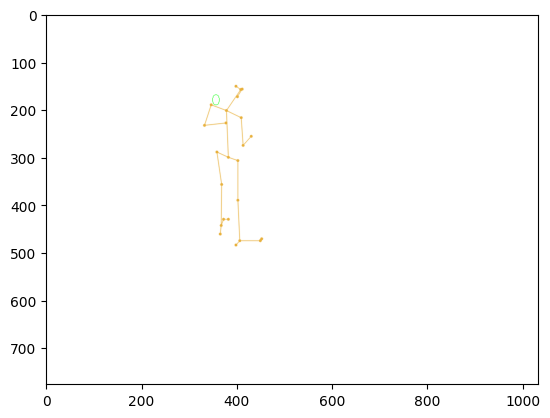

In [157]:
print(wrong_pose_2d)

fig = plt.figure()
plt.tight_layout()

white_bg = np.zeros((776, 1032, 3), dtype=np.uint8)
white_bg[:] = 255

image_points_confidence_score = np.hstack((image_points, right_pose_3d[:, 3:]))

image = draw_skeleton_image(white_bg, np.array([image_points_confidence_score]), None)
plt.imshow(image)
plt.show()

In [158]:
print(image_points_confidence_score)

[[4.08216583e+02 1.58986679e+02 8.89876667e-01]
 [3.78183380e+02 2.02878082e+02 8.31550000e-01]
 [4.09194824e+02 2.17757309e+02 7.38993333e-01]
 [4.13591248e+02 2.75232086e+02 6.23847800e-01]
 [4.30555908e+02 2.56121735e+02 8.82421000e-01]
 [3.46129517e+02 1.90324783e+02 8.29358333e-01]
 [3.32358246e+02 2.33538162e+02 7.61939000e-01]
 [3.77585022e+02 2.28553101e+02 7.23084333e-01]
 [3.82057098e+02 3.00743347e+02 6.59033333e-01]
 [4.02283508e+02 3.07962097e+02 6.16405000e-01]
 [4.02747070e+02 3.90471008e+02 7.30028333e-01]
 [4.06185120e+02 4.75668549e+02 7.62046333e-01]
 [3.58197632e+02 2.89930420e+02 6.45989333e-01]
 [3.68813873e+02 3.57957672e+02 6.58886667e-01]
 [3.67817230e+02 4.43556244e+02 7.31756000e-01]
 [4.11458405e+02 1.57613525e+02 8.40915500e-01]
 [3.98829926e+02 1.51784851e+02 9.09318000e-01]
 [4.01743896e+02 1.73548691e+02 8.61752500e-01]
 [4.96897430e+02 2.61099762e+02 0.00000000e+00]
 [3.82491821e+02 4.30527832e+02 7.74395667e-01]
 [3.72553589e+02 4.30862030e+02 7.514293